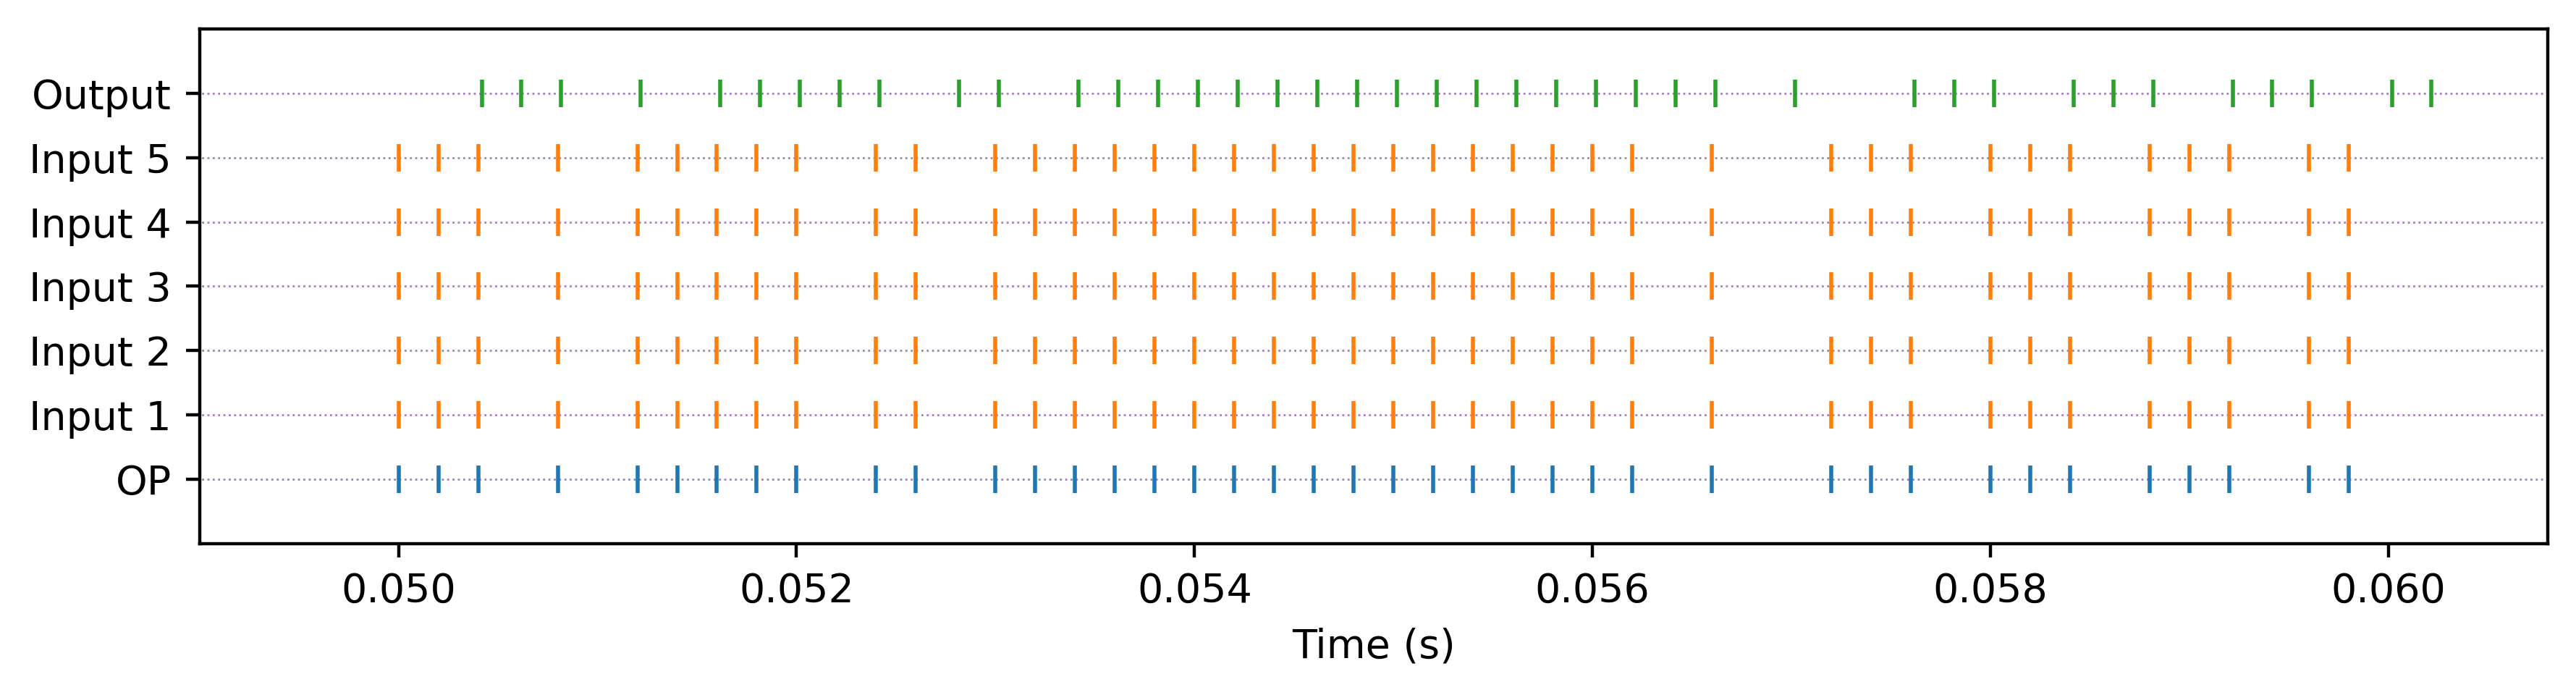

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

filename = "inh_or_5inputs_factor5_1"
folder = "results_OR/"

with open(folder + filename + '.pickle', "rb") as handle:
        sg_times, evts_n = pickle.load(handle)

n_inputs = 5
factor = 5
show_lines = True

plt.rcParams['figure.dpi'] = 400
plt.rcParams['figure.figsize'] = [9, 2.5]

# Lines
if show_lines:
    plt.hlines(range(-1, n_inputs + 3), 0, sg_times[-3] + 0.005 / factor, linestyles='dotted', linewidth=0.50, color='indigo', alpha=0.5)
# ------

plt.plot(sg_times, [1] * len(sg_times), color='tab:blue', linestyle = 'None', marker='|', markersize=7)
for i in range(1, n_inputs + 1):
    plt.plot(sg_times, [i+1] * len(sg_times), color='tab:orange', linestyle = 'None', marker='|', markersize=7)
plt.xlabel('Time (s)')
plt.yticks(range(1, n_inputs + 3))
plt.gca().set_yticklabels(["OP"] + ["Input " + str(i) for i in range(1, n_inputs + 1)] + ["Output"])
plt.xlim([0.05 - 0.005 / factor, sg_times[-3] + 0.005 / factor])
plt.ylim([0, n_inputs + 3])

evts_not = np.array([evt for evt in evts_n if evt[1] == 3])
if len(evts_not) == 0:
    print("Output spikes were not detected")
else:
    plt.plot(evts_not[:,0], [n_inputs + 2] * len(evts_not[:,0]), color='tab:green', linestyle = 'None', marker='|', markersize=7)

plt.tight_layout()
plt.savefig(folder + filename + '.png', transparent=False, facecolor='white', edgecolor='black')